In [49]:
import os
import csv
import numpy as np
from matplotlib import pyplot as plt

In [50]:
def is_number(s):
    """ Returns True if string is a number. """
    try:
        float(s)
        return True
    except ValueError:
        return False

In [51]:
selected_dir = "../benchmarking_results/tuning_nesterov"
selected_accuracy = "1.0e-4"

result_summary_files = []

# Search for the available json files in the results folder:
for subdir, dirs, files in os.walk(selected_dir):
    for file in files:
        if file.endswith(".csv") and selected_accuracy in file:
            result_summary_files.append(os.path.join(subdir, file))
    break # <-- This ensures that we only search in a depth of one.
result_summary_files.sort()
for file in result_summary_files:
    print(file.split("/")[-1])


netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.6_sim_scaling=false.csv
netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.7_sim_scaling=false.csv
netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.80_sim_scaling=false.csv
netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.80_sim_scaling=true.csv
netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.999_sim_scaling=false.csv
netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.999_sim_scaling=true.csv
netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.99_sim_scaling=false.csv
netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.9_sim_scaling=false.csv
netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.9_sim_scaling=true.csv
netlib_benchmark_1.0e-4_PDLP_polish=true.csv


In [52]:
# Data for x-axis in plots: 
similarity_threshold_list = []
kappa_value_list = []
lambda_value_list = []

# Data for y-axis in plots: 
total_iterations_list = []
solved_instances_list = []

for file in result_summary_files:
    total_iterations = 0
    total_seconds = 0
    total_KKT_passes = 0
    instance_counter = 0
    solved_instances = 0
    kkt_sgm_10 = 1
    # print(file.split("/")[-1].removesuffix(".csv"))
    similarity_threshold = file.split("threshold=")[-1].removesuffix(".csv")
    kappa=file.split("kappa=")[-1].split("_")[0]
    lambda_val=file.split("lambda=")[-1].split("_")[0]
    if not is_number(kappa):
        kappa = 0 
    if not is_number(lambda_val):
        lambda_val = 0
    if not is_number(similarity_threshold):
        similarity_threshold = "1.0"
    # print("Similarity Threshold: ", similarity_threshold)
    with open(file, "r") as csv_file:
        file_reader = csv.reader(csv_file)
        
        for line in file_reader:
            instance_counter += 1
        instance_counter -= 1
  
    with open(file, "r") as csv_file:
        file_reader = csv.reader(csv_file)
        
        first_row = True
        for line in file_reader: 
            if first_row:
                first_row = False
            else:
                termination_reason = line[1].strip()
                if termination_reason == "TERMINATION_REASON_OPTIMAL":
                    solved_instances += 1
                if termination_reason == "TEMINATION_REASON_ITERATION_LIMIT":
                    kkt_passes = 100000
                else:
                    kkt_passes = float(line[4].strip())
                total_iterations += int(line[2].strip())
                total_seconds += float(line[3].strip())
                total_KKT_passes += kkt_passes
                
                kkt_sgm_10 *= (kkt_passes + 10)**(1/instance_counter)
    kkt_sgm_10 = (kkt_sgm_10) - 10

    print(file.split("/")[-1])    
    # print(" - Total iterations: ", total_iterations) 
    print(" - Number of instances solved: ", solved_instances, "/", instance_counter) 
    # print(" - Total seconds: ", total_seconds)
    print(" - Total KKT passes: ", total_KKT_passes)
    print(" - SGM10 KKT passes: ", kkt_sgm_10)
    # Saving the stats for a comparison plot:
    similarity_threshold_list.append(float(similarity_threshold))
    kappa_value_list.append(float(kappa))
    lambda_value_list.append(float(lambda_val))
    total_iterations_list.append(int(total_iterations))
    solved_instances_list.append(solved_instances)

netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.6_sim_scaling=false.csv
 - Number of instances solved:  102 / 113
 - Total KKT passes:  2297700.0
 - SGM10 KKT passes:  5499.161469386152
netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.7_sim_scaling=false.csv
 - Number of instances solved:  102 / 113
 - Total KKT passes:  2218110.0
 - SGM10 KKT passes:  5507.6928358723
netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.80_sim_scaling=false.csv
 - Number of instances solved:  102 / 113
 - Total KKT passes:  2198755.0
 - SGM10 KKT passes:  5352.947873322336
netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.80_sim_scaling=true.csv
 - Number of instances solved:  103 / 113
 - Total KKT passes:  2151463.0
 - SGM10 KKT passes:  5391.001354840895
netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.999_sim_scaling=false.csv
 - Number of instances solved:  100 / 113
 - Total KKT passes:  2428750.0
 - SGM10 KKT passes:  6080.973055155547

Text(0, 0.5, 'Number of instances solved')

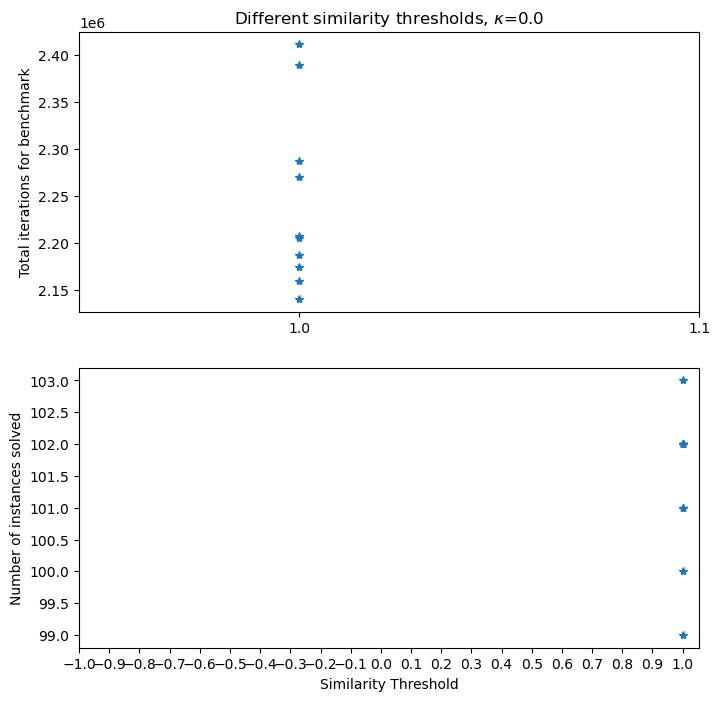

In [53]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)

plt.plot(similarity_threshold_list, total_iterations_list, "*")
plt.title(fr"Different similarity thresholds, $\kappa$={kappa_value_list[-1]}")
plt.xticks(np.arange(min(similarity_threshold_list), max(similarity_threshold_list) + 0.1, 0.1))

# plt.plot(kappa_value_list, total_iterations_list, "*")
# plt.title(fr"Different $\kappa$, threshold = {similarity_threshold_list[-1]}")
# plt.xticks(np.arange(0,1.1,0.1))

plt.ylabel("Total iterations for benchmark")
plt.subplot(2, 1, 2)

plt.plot(similarity_threshold_list, solved_instances_list, "*")
plt.xticks(np.arange(-1,1.1,0.1))

# plt.plot(kappa_value_list, solved_instances_list, "*")
# plt.xticks(np.arange(0,1.1,0.1))

plt.xlabel("Similarity Threshold")
plt.ylabel("Number of instances solved")


# Largest inertia winners:
- L1_sixm250obs

# Largest inertia losers: (maybe tune a little bit on these)
- buildingenenergy
- degme